In [1]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

In [2]:
df = pd.read_csv('./reduced1.csv')
df

,User_ID,Rating,Movie_ID
0,44937,5,3
1,66414,5,3
2,67315,4,3
3,79160,4,3
4,6689,4,3
...,...,...,...
644146,50400,5,4496
644147,24059,5,4496
644148,10897,2,4496
644149,13017,3,4496


In [3]:
df.dtypes

User_ID     int64
Rating      int64
Movie_ID    int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644151 entries, 0 to 644150
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   User_ID   644151 non-null  int64
 1   Rating    644151 non-null  int64
 2   Movie_ID  644151 non-null  int64
dtypes: int64(3)
memory usage: 14.7 MB


In [5]:
df['Rating'].describe().astype('int')

count    644151
mean          3
std           1
min           1
25%           3
50%           4
75%           4
max           5
Name: Rating, dtype: int32

In [6]:
print('Unique Values:\n',df.nunique())

Unique Values:
 User_ID     5431
Rating         5
Movie_ID    1350
dtype: int64


In [7]:
df_title = pd.read_csv('./Netflix_Dataset_Movie.csv')
df_title

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


In [8]:
df_title.dtypes

Movie_ID     int64
Year         int64
Name        object
dtype: object

In [9]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


In [10]:
df_title['Year'].describe().astype('int')

count    17770
mean      1990
std         16
min       1915
25%       1985
50%       1997
75%       2002
max       2005
Name: Year, dtype: int32

In [11]:
print('Unique Values:\n',df_title.nunique())

Unique Values:
 Movie_ID    17770
Year           91
Name        17297
dtype: int64


In [12]:
no_of_rated_products_per_users = df.groupby(by='User_ID')['Rating'].count().sort_values(ascending = False)
no_of_rated_products_per_users.head()

User_ID
16272    958
57633    905
49890    740
3321     688
74441    679
Name: Rating, dtype: int64

In [13]:
no_of_rated_products_per_users.describe()

count    5431.000000
mean      118.606334
std        78.167625
min        22.000000
25%        67.000000
50%        93.000000
75%       144.000000
max       958.000000
Name: Rating, dtype: float64

In [14]:
import matplotlib as mpl
mpl.rc('axes', edgecolor='white')
mpl.rc('xtick', color='white')
mpl.rc('ytick', color='white')

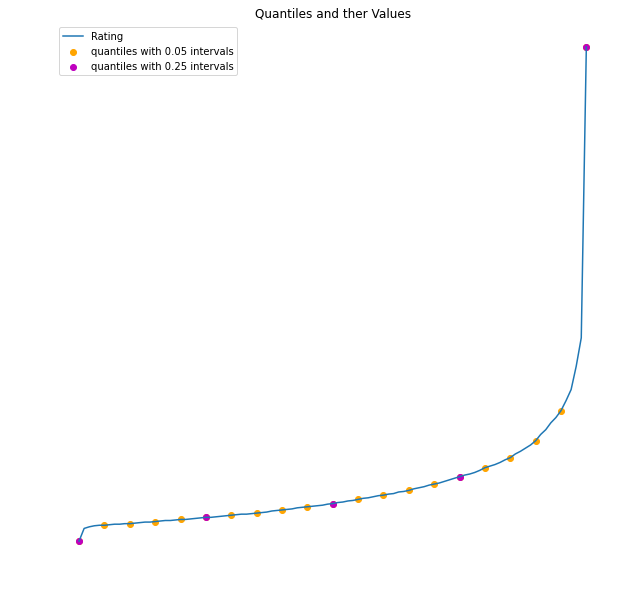

In [15]:
quantiles = no_of_rated_products_per_users.quantile(np.arange(0, 1.01, 0.01), interpolation='higher')

plt.figure(figsize = (10,10))
plt.title('Quantiles and ther Values')
quantiles.plot()
plt.scatter(x = quantiles.index[::5], y = quantiles.values[::5], c='orange', label='quantiles with 0.05 intervals')
plt.scatter(x = quantiles.index[::25], y = quantiles.values[::25], c='m', label='quantiles with 0.25 intervals')
plt.ylabel('No of ratings given by user', color='white')
plt.xlabel('Value at the quantile', color = 'w')
plt.legend(loc='best')
plt.show()


In [16]:
no_of_rated_products_per_movies = df.groupby(by='Movie_ID')['Rating'].count().sort_values(ascending = False)
no_of_rated_products_per_movies.head()

Movie_ID
1905    4460
2452    3905
571     3852
4306    3842
3860    3716
Name: Rating, dtype: int64

In [17]:
print(df_title.loc[df_title['Movie_ID']==1905])

      Movie_ID  Year                                               Name
1904      1905  2003  Pirates of the Caribbean: The Curse of the Bla...


In [18]:
no_of_rated_products_per_movies.describe()

count    1350.000000
mean      477.148889
std       671.918704
min        40.000000
25%        95.250000
50%       190.500000
75%       543.250000
max      4460.000000
Name: Rating, dtype: float64

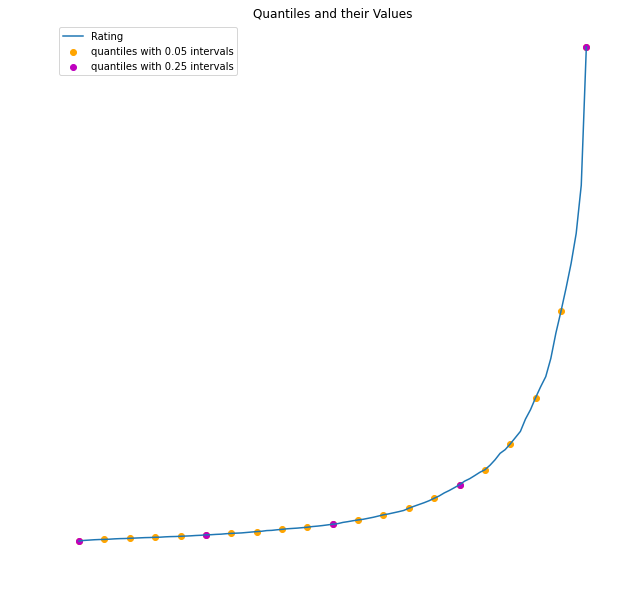

In [19]:
quantiles = no_of_rated_products_per_movies.quantile(np.arange(0,1.01,0.01), interpolation='higher')

plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings given to movies',color='white')
plt.xlabel('Value at the quantile', color='white')
plt.legend(loc='best')
plt.show()

In [20]:
f = ['count', 'mean']
df_movie_summary = df.groupby('Movie_ID')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

df__title = df_title.set_index('Movie_ID')

In [23]:
data = df['Rating'].value_counts()
trace = go.Bar(x = data.index, y = data.values, text = ['{:.1f}'.format(val) for val in (data.values/df.shape[0] * 100)],textposition='auto')
layout = dict(title = 'Distribution of {} Movie-ratings'.format(df.shape[0]), xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Movies'),width=800,height=500)
fig = go.Figure(data=[trace],layout=layout)
iplot(fig)

In [24]:
data = df_title['Year'].value_counts()
trace = go.Bar(x = data.index,y = data.values,text = ['{:.1f} %'.format(val) for val in (data.values / df_title.shape[0] * 100)],textposition = 'auto')
layout = dict(title = 'Distribution of {} Movie-Year-wise'.format(df.shape[0]), xaxis = dict(title = 'Year'), yaxis = dict(title = 'Movies'),width=1000,height=700)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [25]:
df_2004 = df_title[df_title['Year']==2004]
df_2004 = df_2004.merge(df,on='Movie_ID')
data = df_2004['Rating'].value_counts()
trace = go.Bar(x = data.index,y = data.values,text = ['{:.1f} %'.format(val) for val in (data.values / df_2004.shape[0] * 100)],textposition = 'auto')
layout = dict(title = 'Distribution of {} Movie-ratings released in 2004'.format(df.shape[0]), xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Movies'),width = 800,height=500)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [26]:
df_max_ratings = df_movie_summary[df_movie_summary['count']==df_movie_summary['count'].max()]
req_MID = df_max_ratings.index[0]
df_max_ratings = df[df['Movie_ID'] ==req_MID]
Movie_name_max_raings = df_title['Name'][df_title['Movie_ID']==req_MID].to_string(index=False)
data = df_max_ratings['Rating'].value_counts()
trace = go.Bar(x = data.index,y = data.values,text = ['{:.1f} %'.format(val) for val in (data.values / df_max_ratings.shape[0] * 100)],textposition = 'auto')
layout = dict(title = 'Distribution of Most Rated Movie-'+Movie_name_max_raings+ ' Movie-Ratings',width=800,height=500)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)